# Data Preprocessing

Importing the necessary libraries

In [2]:
import json
import pandas as pd
import string
import re
import numpy as np 
import seaborn as sns
import nltk 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
file_path = "C:/Users/Lenovo/Desktop/IT coding/IT project/news.json"
with open(file_path, "r") as file:
    data = json.load(file)

In [15]:
data = pd.DataFrame(data)
data.head()

,Category,Full_description,Title
0,Politics,What should be sending alarm bells through the...,Here’s why Democrats should be worried about t...
1,Politics,"Italian Prime Minister Giorgia Meloni, center,...",Opinion: What 2022’s elections taught me about...
2,Politics,CNN —Most people don’t want to work into their...,"The consequences of old, powerful politicians ..."
3,Politics,CNN —After the attack on the US Capitol on Jan...,Opinion: A dangerous trend for election disinf...
4,Politics,“Governors are uniquely positioned to take thi...,Bipartisan governors challenge Americans to di...


Preprocessing is a crucial initial step in _Natural Language Processing_, involving the following key procedures:

1. __Tokenization__: Breaking down text into individual words or tokens.

2. __Stopword Removal__: Eliminating common words (e.g., "the," "and") that don't carry significant meaning.

3. __Lemmatization__: Reducing words to their base or dictionary form to ensure consistency.

The goal is to render text in a format that is easily interpretable by machines. It's essential to apply these processes selectively, focusing on words that contribute genuine semantic value to the text.
The example provided aims to illustrate how sentences are condensed after applying the __clean_text__ function. However, it's worth noting that there's room for improvement since special characters must be removed. For instance, if a significant word appears at the end of a sentence and is followed by a question mark, the subsequent algorithm might interpret the same word differently. 

To illustrate, consider the word "*circle,*" which may be recognized differently as "*circle.*" Although humans perceive no distinction between the two, such discrepancies can arise. Therefore, the next step in the process will involve making the text more suitable for text conversion.

In [5]:
def clean_text(text):
    '''
    Pre-processing the input text:

    Input: 
        Text or batch of text
    
    Output:
        It returns a modified version of the text by performing: tokenization, removal of stop words and stemmatization.
    '''
    tokenized = word_tokenize(text.lower())
    alphabetic = [word for word in tokenized if word.isalpha()]
    
    stop_words = set(stopwords.words("english"))
    filtered_sublist = [token for token in alphabetic if token not in stop_words]
    
    lemmatizer = WordNetLemmatizer()
    lemmatized_sublist = [lemmatizer.lemmatize(token) for token in filtered_sublist]

    cleaned_text = ' '.join(lemmatized_sublist).strip()
    
    return cleaned_text 

In [16]:
data['Cleaned_texts'] = data['Full_description'].apply(clean_text)

In [7]:
print(f'Cleaned Text (First Row):\n{data["Cleaned_texts"].iloc[0]}')
print()
print(f'Full Description (First Row):\n{data["Full_description"].iloc[0]}')

Cleaned Text (First Row):
sending alarm bell white house democratic circle independent turning president joe biden recent poll republican routinely taken white house fewer vote really thinkmore independent republican democrat overshadowed trump hold republican party still portion democrat say liberal soared today

Full Description (First Row):
What should be sending alarm bells through the White House and Democratic circles is that independents are turning on President Joe Biden in recent polls.
Republicans have routinely taken the White House with fewer votes (2000 and 2016).
Here’s what they really thinkMore independents than Republicans or Democrats.
But they are overshadowed by Trump’s hold on the Republican Party.
Still, the portion of Democrats who say they’re liberal has soared from 25% in 1994 to 51% today.


The __clean_text__ function functions as a data pipeline, optimizing various vital text processing steps. To gain a visual understanding of how these steps transform the text, it would be valuable to observe the sequential evolution of a sentence.

In [8]:
data.head()

,Category,Full_description,Title,Cleaned_texts
0,Politics,What should be sending alarm bells through the...,Here’s why Democrats should be worried about t...,sending alarm bell white house democratic circ...
1,Politics,"Italian Prime Minister Giorgia Meloni, center,...",Opinion: What 2022’s elections taught me about...,italian prime minister giorgia meloni center f...
2,Politics,CNN —Most people don’t want to work into their...,"The consequences of old, powerful politicians ...",cnn people want work powerful washington refus...
3,Politics,CNN —After the attack on the US Capitol on Jan...,Opinion: A dangerous trend for election disinf...,cnn attack u capitol january tech company crac...
4,Politics,“Governors are uniquely positioned to take thi...,Bipartisan governors challenge Americans to di...,governor uniquely positioned take actually get...


In [17]:
df_to_dict = data.to_dict()
file_path = "C:/Users/Lenovo/Desktop/IT coding/IT project/news.json"
with open(file_path, 'w') as json_file:
    json.dump(df_to_dict, json_file)

After completing the cleaning process, it is noteworthy to observe the significant impact it had on the original text. This effect is visually represented in a pie chart, illustrating the extent to which the process truncated the entire text. The remaining words now constitute less than half of the original count, indicating that a substantial portion of our initial data proved nonessential for the intended classification purpose.

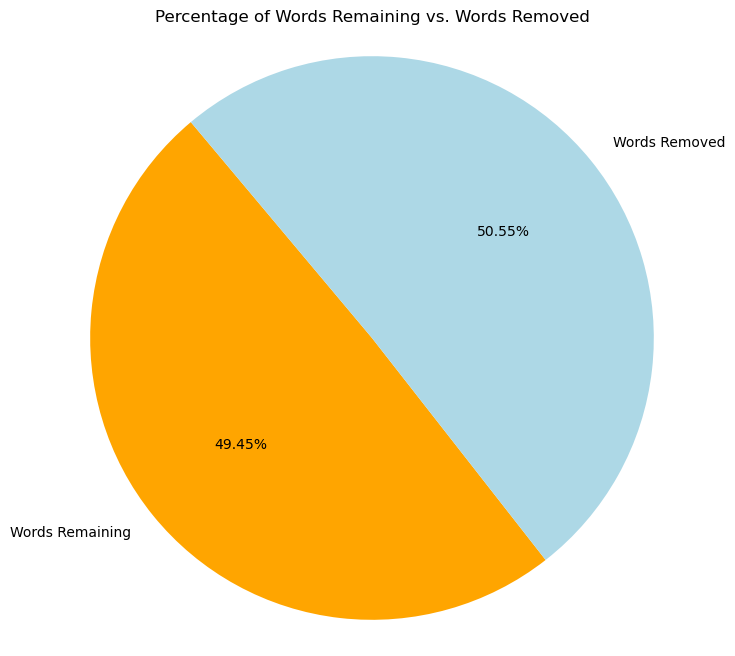

In [18]:
data['Word_count_Full'] = data['Full_description'].apply(lambda text: len(word_tokenize(text)))
data['Word_count_Cleaned'] =  data['Cleaned_texts'].apply(lambda text: len(word_tokenize(text)))

words_full = np.sum(data['Word_count_Full'])
words_cleaned = np.sum(data['Word_count_Cleaned'])

percentage_remaining = (words_cleaned / words_full) * 100
percentage_removed = 100 - percentage_remaining

word_counts = [percentage_remaining, percentage_removed]
labels = ['Words Remaining', 'Words Removed']
colors = ['orange', 'lightblue']

plt.figure(figsize=(8, 8))
plt.pie(word_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=130)
plt.title('Percentage of Words Remaining vs. Words Removed')
plt.axis('equal') 

plt.show()

To enhance my comprehension of the textual transformations and to get myself ready for the Exploratory Data Analysis, I examined it across the four available categories. Notably, I observed an equal distribution of changes, indicating that the alterations were consistently spread across all categories.

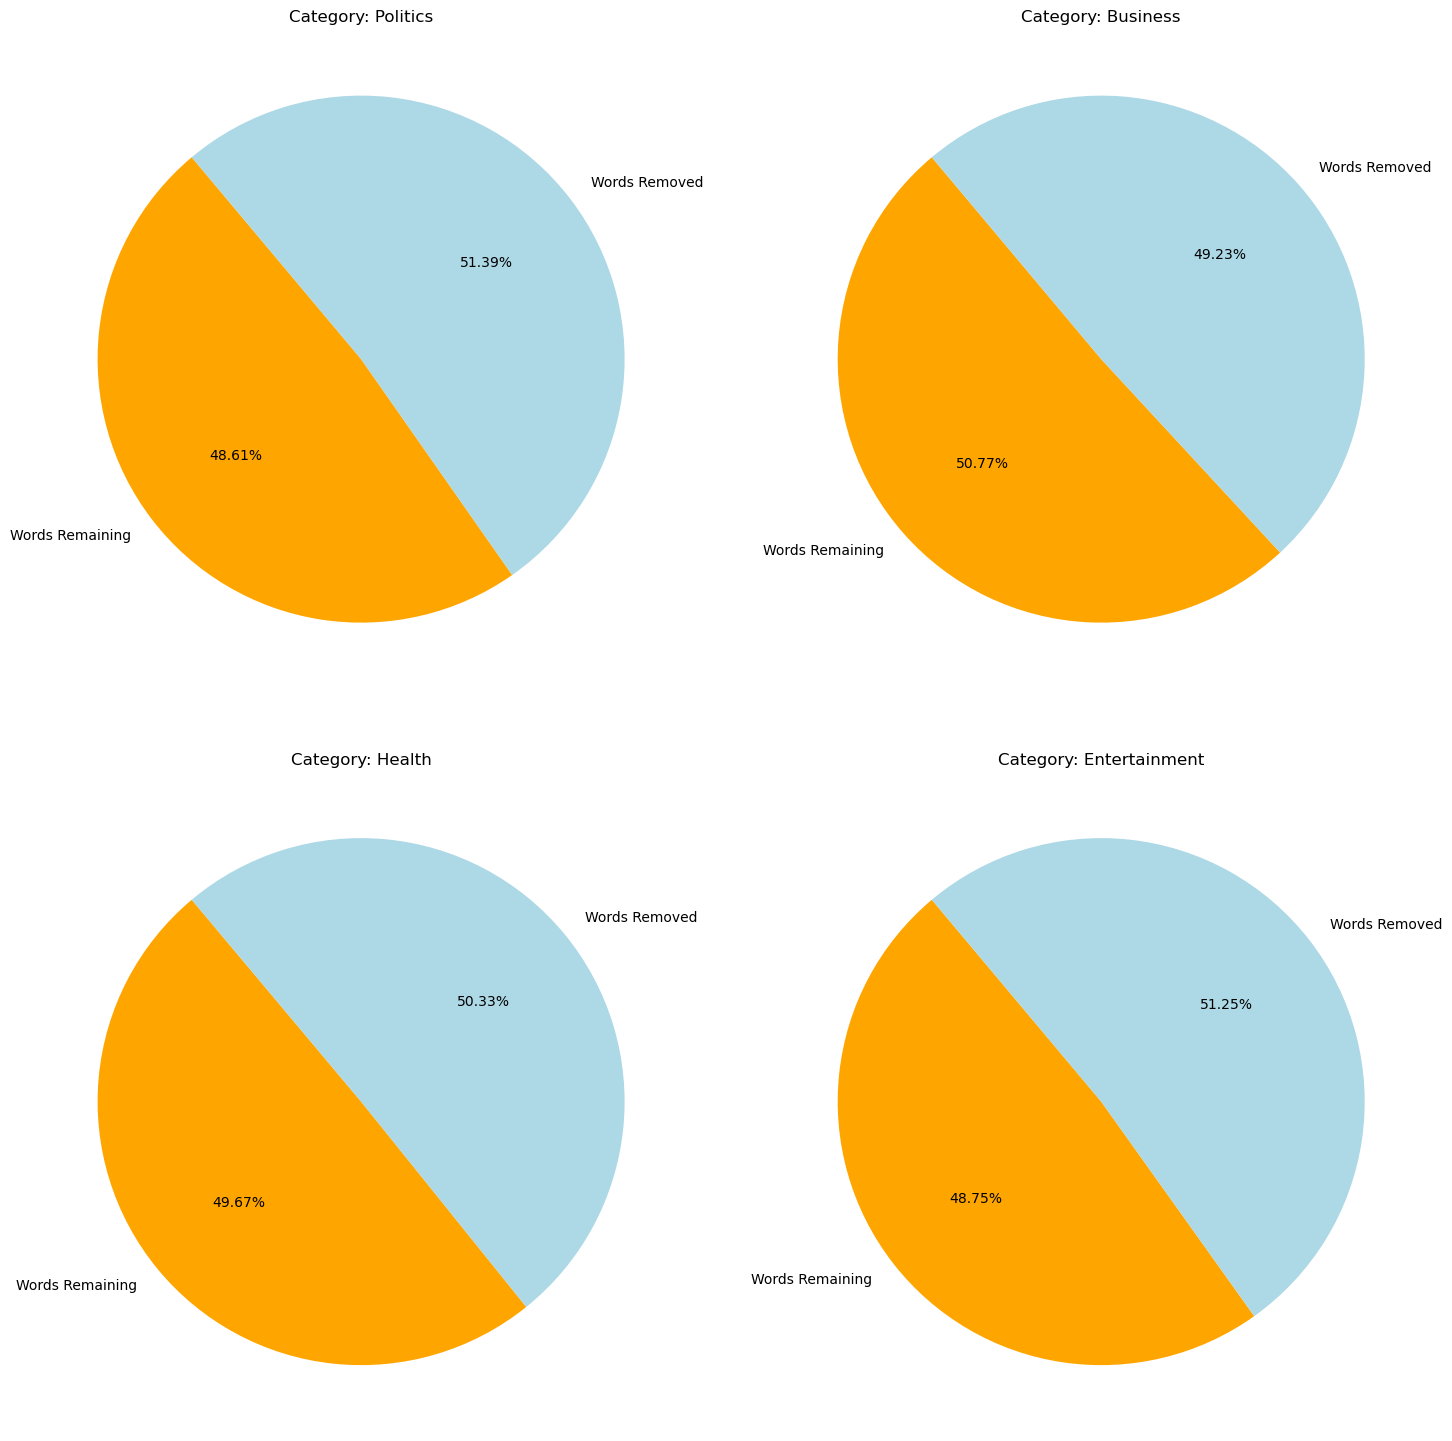

In [19]:
categories = data['Category'].unique()
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

for i, category in enumerate(categories):
    words_full = data[data['Category'] == category]['Word_count_Full'].sum()
    words_cleaned = data[data['Category'] == category]['Word_count_Cleaned'].sum()

    percentage_remaining = (words_cleaned / words_full) * 100
    percentage_removed = 100 - percentage_remaining

    word_counts = [percentage_remaining, percentage_removed]
    labels = ['Words Remaining', 'Words Removed']
    colors = ['orange', 'lightblue']

    ax = axs[i // 2, i % 2]
    ax.pie(word_counts, labels=labels, colors=colors, autopct='%1.2f%%', startangle=130)
    ax.set_title(f'Category: {category}')

plt.tight_layout()
plt.show()